<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week9/Day2/Exercises_Week9_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Student Mental health Document.zip to Student Mental health Document.zip


In [2]:
import zipfile
import os

# Setting paths
zip_path = "Student Mental health Document.zip"
extract_to = "student_data"

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Checking contents
print(os.listdir(extract_to))

['Student Mental health.csv']


In [3]:
import pandas as pd

# Replace the filename below with the correct CSV filename if needed
df = pd.read_csv("student_data/Student Mental health.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Exercise 1: Visualizing the Distribution of CGPA

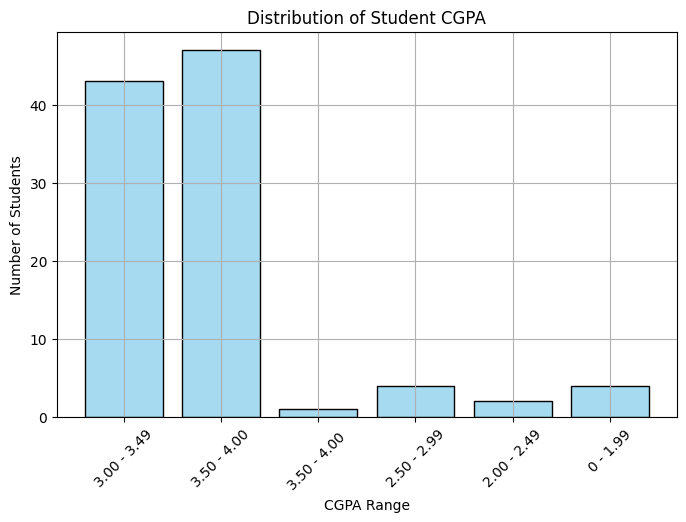

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df.rename(columns={"What is your CGPA?": "CGPA"}, inplace=True)

# Figure size
plt.figure(figsize=(8, 5))

# CGPA distribution
sns.histplot(data=df, x="CGPA", color="skyblue", shrink=0.8, discrete=True)

# Customizations
plt.title("Distribution of Student CGPA")
plt.xlabel("CGPA Range")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()

Exercise 2: Comparing Anxiety Levels Across Genders

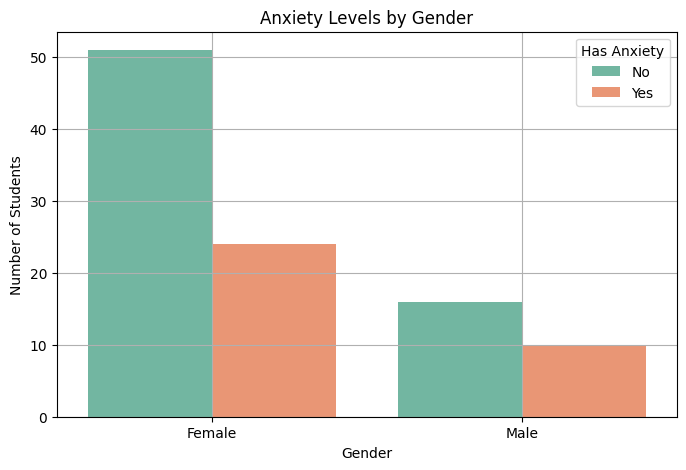

In [5]:
# Renaming columns to simpler names
df.rename(columns={
    "Choose your gender": "Gender",
    "Do you have Anxiety?": "Anxiety"
}, inplace=True)

# Figure size
plt.figure(figsize=(8, 5))

# Creating bar plot: count of anxiety responses by gender
sns.countplot(data=df, x="Gender", hue="Anxiety", palette="Set2")

# Labels and title
plt.title("Anxiety Levels by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.legend(title="Has Anxiety")
plt.grid(True)

# Show plot
plt.show()

Exercise 3: Exploring the Relationship Between Age and Panic Attacks

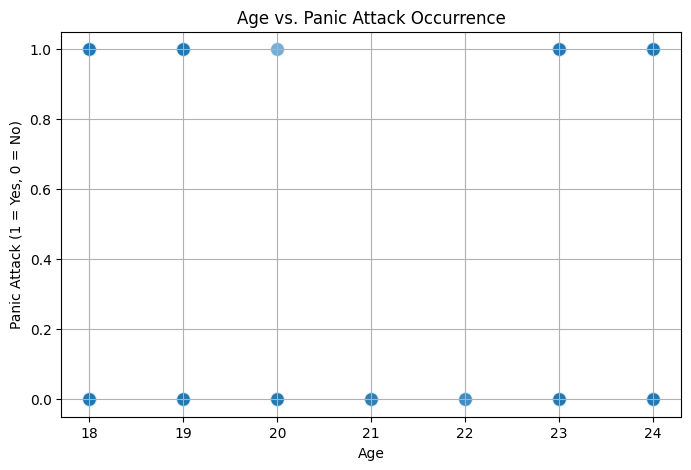

In [6]:
# Renaming for easier access
df.rename(columns={
    "Do you have Panic attack?": "Panic"
}, inplace=True)

# Converting 'Panic' Yes/No to numeric (Yes → 1, No → 0)
df["Panic_numeric"] = df["Panic"].map({"Yes": 1, "No": 0})

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Age", y="Panic_numeric", alpha=0.6, s=100)

# Title and labels
plt.title("Age vs. Panic Attack Occurrence")
plt.xlabel("Age")
plt.ylabel("Panic Attack (1 = Yes, 0 = No)")
plt.grid(True)
plt.show()

Exercise 4: Pairwise Relationships with Seaborn Pair Plot

In [8]:
print(df.columns.tolist())

['Timestamp', 'Gender', 'Age', 'What is your course?', 'Your current year of Study', 'CGPA', 'Marital status', 'Do you have Depression?', 'Anxiety', 'Panic', 'Did you seek any specialist for a treatment?', 'Panic_numeric', 'Depression']


In [9]:
# Map mental health responses to 1 = Yes, 0 = No
df['Anxiety_numeric'] = df['Anxiety'].map({'Yes': 1, 'No': 0})
df['Panic_numeric'] = df['Panic'].map({'Yes': 1, 'No': 0})
df['Depression_numeric'] = df['Do you have Depression?'].map({'Yes': 1, 'No': 0})

# To verify
df[['Age', 'CGPA', 'Anxiety_numeric', 'Panic_numeric', 'Depression_numeric']].head()

,Age,CGPA,Anxiety_numeric,Panic_numeric,Depression_numeric
0,18.0,3.00 - 3.49,0,1,1
1,21.0,3.00 - 3.49,1,0,0
2,19.0,3.00 - 3.49,1,1,1
3,22.0,3.00 - 3.49,0,0,1
4,23.0,3.00 - 3.49,0,0,0


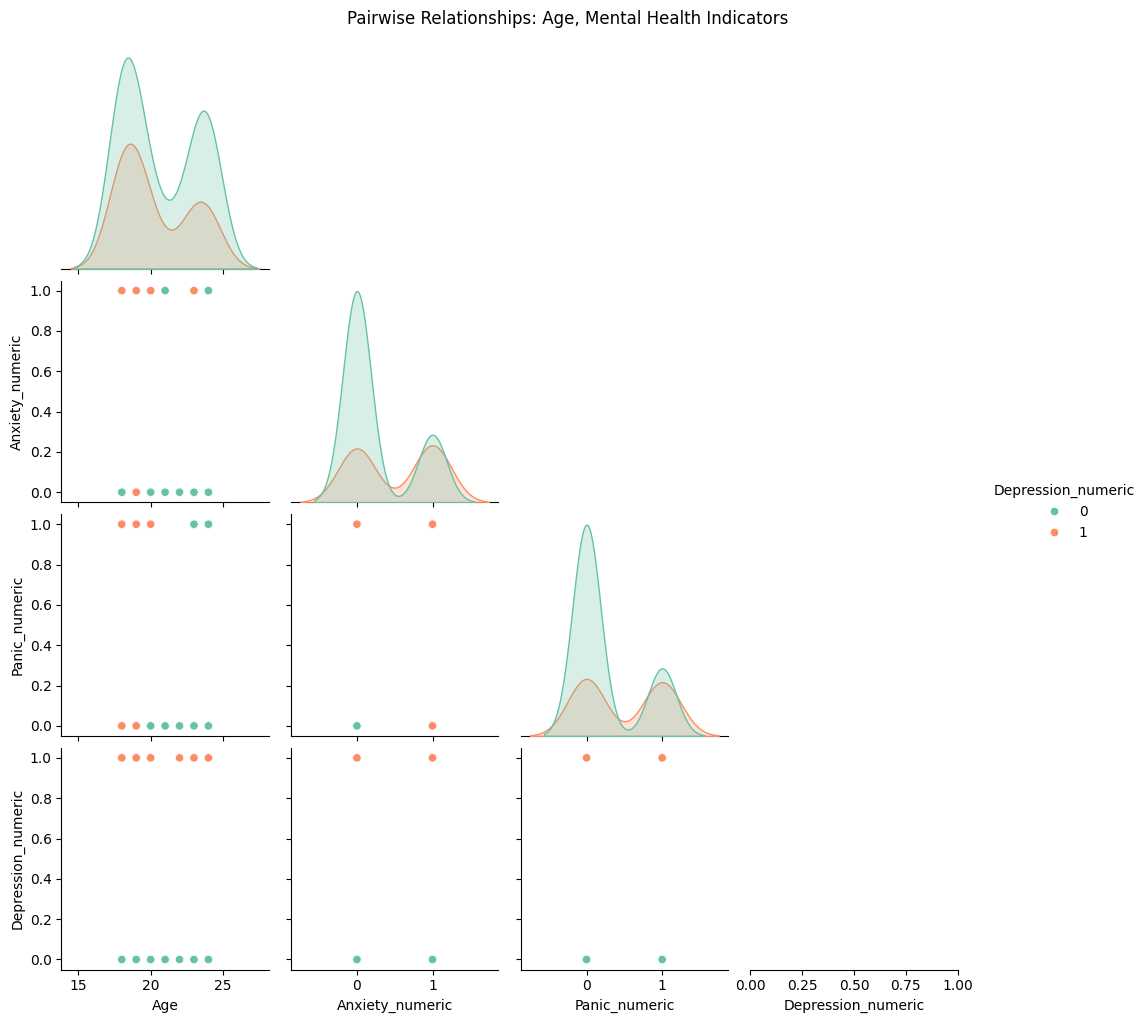

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df,
    vars=['Age', 'Anxiety_numeric', 'Panic_numeric', 'Depression_numeric'],
    hue='Depression_numeric',
    palette='Set2',
    corner=True
)

plt.suptitle("Pairwise Relationships: Age, Mental Health Indicators", y=1.02)
plt.show()

Exercise 5: Creating a Heatmap to Visualize Correlations.

In [14]:
# Converting CGPA range string to numeric
df['CGPA_numeric'] = df['CGPA'].str.extract(r'(\d+\.\d+)').astype(float)

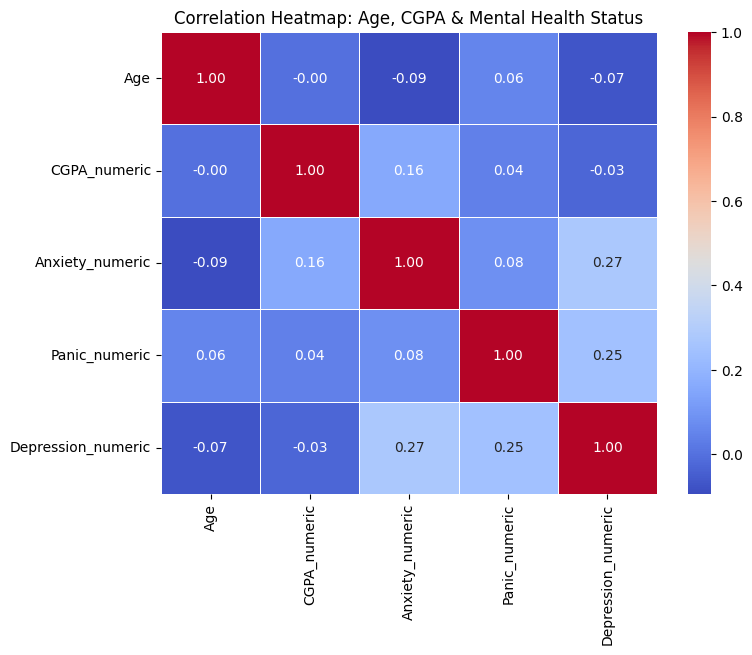

In [15]:
# Selecting relevant numeric columns
corr_matrix = df[['Age', 'CGPA_numeric', 'Anxiety_numeric', 'Panic_numeric', 'Depression_numeric']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Age, CGPA & Mental Health Status")
plt.show()

Exercise 6: Analyzing CGPA Distribution by Depression Status using FacetGrid

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


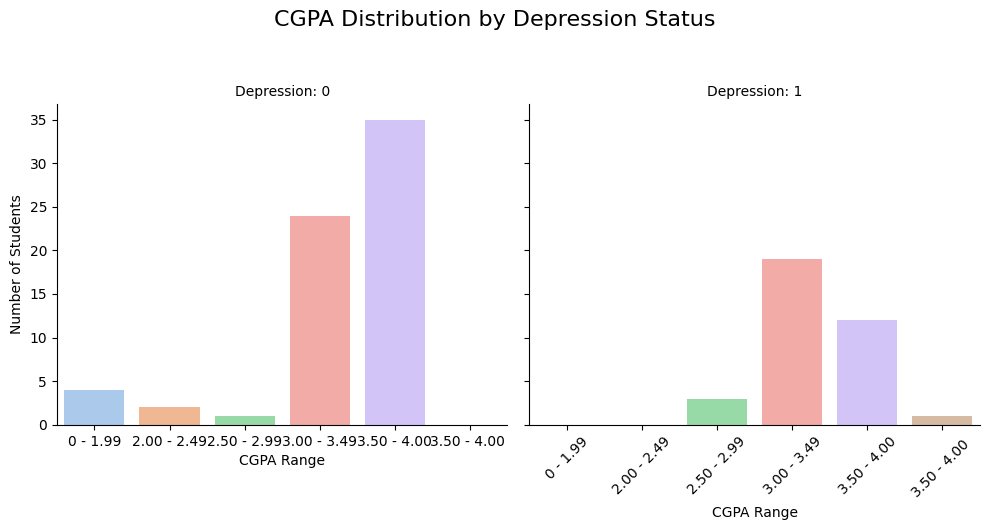

In [16]:
# Setting up FacetGrid by depression status
g = sns.FacetGrid(df, col='Depression_numeric', height=5, aspect=1)

# Mapping a histogram of CGPA to each facet
g.map(sns.countplot, 'CGPA', order=sorted(df['CGPA'].unique()), palette='pastel')

# Titles and labels
g.set_axis_labels("CGPA Range", "Number of Students")
g.set_titles("Depression: {col_name}")
g.fig.suptitle("CGPA Distribution by Depression Status", fontsize=16, y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()